# How big can a neutron star be? 

#### By Auguste Bieleviciute


## Introduction


The term neutron star is generally used to describe a star with a mass between 1.4 to 3 solar masses and with a radius of around 10 km wide[1]. Its existence was postulated by Walter Baade and Fritz Zwicky in 1933 just 2 years after the neutron was discovered[2]. Baade and Zwicky were investigating how supernovas are formed and they predicted that the enormous release of energy in a supernova explosion comes from the gravitational binding energy[3]. In 1965 the first neutron star was discovered in the Crab Nebula by Antony Hewish[4].


Neutron stars have enormous mass compacted into a sphere of such a small radius which makes the stars incredibly dense. This enormous pressure makes the protons and the electrons in the matter combine into neutrons and the star becomes as compact as a single nucleus[5]. Neutron degeneracy pressure, described by the Pauli exclusion principle[6], creates an outward force that keeps the star from collapsing upon itself. If the pressure is further increased (either the radius is shortened or the mass is increased), the neutron star becomes unstable and collapses into a black hole. Before the discovery of these stars, this limit was thought to be the Chandrasekhar limit[7] which described the maximum mass a white dwarf can reach, which was calculated to be around 1.4 solar masses[8] (white dwarfs resist the gravitational collapse through electron degeneracy pressure). The existence of neutron stars proved that this limit is incorrect and only describes the maximum size a white dwarf can be before collapsing into a neutron star. This led to J. Robert Oppenheimer and George Volkoff to investigate the upper limit of the possible size of such star. The hydrostatic equilibrium equation has to be integrated with an assumed equation of state to find a radius of any star with a given mass. Oppenheimer and Volkoff realised that equation needs to be modified to fit the model of the neutron star by adding Newtonian gravity from general relativity[9]. The Tolman-Oppenheimer-Volkoff limit was then derived to be:

$-\frac{dP}{dr}$ = $\frac{G[M(r) + 4\pi r^3 \frac{P(r)}{c^2}[\rho(r) + \frac{P(r)}{c^2}]}{r^2[1 - \frac{2 G M(r)}{rc^2}}$ (1)

$m(r)$ = $4\pi r^2\rho$ (2)

where P(r) - pressure as function of radius, r - radius, M(r) - gravitational mass as a function of radius, $\rho$(r) - mass-energy density as a function of radius.

In order to calculate the maximum size a neutron star can be with the use of the TOV equation, an equation of state is needed. Equation of state describes how the pressure changes as a function of the density. The most widely used EOS, in this case, is the polytropic model equations[10]:

$P$ = $K\rho^\frac{n+1}{n}$ (3) 

$P$ = $K\rho_g^\frac{n+1}{n}$ (4)

$\rho$ = $\rho_g + np/c^2$ (5)

where P - pressure, K - constant of proportionality, n - polytropic index, $\rho$ - rest mass-energy density and $\rho_g$ - total mass-energy density. The polytropic index for neutron stars is usually n $\approx$ 1[11]. The TOV equation and the EOS can be simplified with the use of natural units, where $G$ = $c$ = 1 and the conversion factor can be derived to be equal to 1.476701332464468e+05.


## Method


To investigate the maximum mass of a neutron star using python, the following steps were taken: defining the equations of state, the TOV equation. Euler's method for solving this ODE is implemented and the resulting curve was plotted and thus the maximum mass value is found.


### Defining the equations of state:


The first equation of state is derived from equations 4-5 and is defined in a way to take in 3 arguments: the pressure, the constant of proportionality and the polytropic index. This function returns two values: total mass-energy density and the rest-mass energy density. If the rest-mass energy density is given, the second function is used for the equation of state. Similarly, as the EquationOfState1, the constant k and the polytropic index can be specified, this is later used to investigate how these change the mass-radius curve for neutron stars. The second equation of state returns two values as well: the total mass-energy density and the pressure.

In [284]:
import numpy as np #Numpy library for calculations
import matplotlib.pyplot as plt #matplotlib.pyplot for plotting graphs
conversionfactor = 1.476701332464468e+05

In [285]:
def EquationOfState1(p, k, n):
    """Equation of state for the polytropic model
    
    Given: Pressure (p), constant of proportinality (k), polytropic index (n)
    Return: total mass-energy density (rho), rest mass-energy density (rhog)"""
    
    rho = (p/k)**(1/(1 + 1/n)) + n*p
    rhog = (p/k)**(1/(1 + 1/n))
    
    return rho, rhog

def EquationOfState2(rhog, k, n):
    """Equation of state for the polytropic model
    
    Given: rest mass-energy density (rhog), constant of proportinality (k), polytropic index (n)
    Return: total mass-energy density (rho), pressure (p)"""
    
    p = k*rhog**(1 + 1/n)
    rho = rhog + n*p
    
    return rho, p

### Defining the Tolmann-Oppenheimer-Volkoff equation


The TOV equation is used to find out what the pressure and the mass of the star are at a certain given radius. Equation 1 is used to find the pressure and equation 2 to find the mass in this case. The function TOV takes in the values for the radius and a tuple consisting of mass and pressure and returns another tuple with the new calculated mass and pressure. This function is extensively used later for integration.

In [286]:
def TOV(radius, masspressure):
    """The Tolmann-Oppenheimer-Volkhoff equations for mass and pressure at radius r

    Given: radius of sphere (radius), touple consisting of mass and pressure (masspressure)
    Return: touple consisting of mass and pressure (mpnew)"""
    
    mass = masspressure[0]  #unpacking the touple
    pressure = masspressure[1]
    
    rho, dummy = EquationOfState1(pressure, 100, 1) #calculating rho using the EOS
    
    mpnew = np.empty_like(masspressure)
    mpnew[0] = 4*np.pi*rho*radius**2
    mpnew[1] = (-(rho + pressure))*(mass + 4*np.pi*pressure*radius**3)/(radius*(radius - 2*mass))
    #calculating the new mass and pressure
    return mpnew

#### ODE integration


The Eulers method is utilised for ODE integration. The function takes in an array of all radii values, the initial values for the mass and pressure and the TOV function. To find the difference between the subsequent radii values, the NumPy diff() function is defined as the dr value. This dr value is multiplied and added with the TOV function and a new value for the mass and pressure is retrieved. The eulersmethodforTOV function starts integrating from the middle of the star outwards therefore when the actual radius of a star is reached the function must stop integrating. To overcome this problem, an event function called finalradius is defined. It returns False until the pressure becomes negative (the pressure outside the star becomes 0 or negative), then it returns True and tells the integration function to stop and return the previous value for the mass and pressure before the pressure became negative.

In [287]:
def finalradius(masspressure):
    """An event function that tells the ODE function when to stop integrating
       In this case it stops when the pressure becomes less than zero and returns True
       
    Given: a touple of the star mass and pressure (masspressure)
    Returns: a boolean value, returns True when pressure is less that zero"""
    if masspressure[1] < 0:
        return True
    else:
        return False

def eulersmethodforTOV(r_array, mp0, TOVfunction):
    """Eulers method for ODE integration accomodated to solve the TOV equation
    
    Given: an array of radius values (r_array), a touple consisting of initial mass and pressure values (mp0), the TOV function (TOVfunction)
    Returns: maximum radius for this star (r_array[i-1]), mass and minimum pressure for this star (previous)"""
    mp = mp0
    dr = np.diff(r_array)[0]
    for i in range(len(r_array)):
        #print(r_array[i], mp)
        previous = np.copy(mp)
        mp += dr * TOVfunction(r_array[i], mp)
        if finalradius(mp) is True:
            return r_array[i-1], previous

The initial parameters are chosen such that the radius starts ideally from 0 and goes outward to 20km as the typical neutron star has a radius of $\approx$11 km[12] The starting radius, although cannot be 0 as this makes the equations singular. Thus a small value for the radius is used and in this case, it is $10^{-8}$ km. The linspace() function from NumPy is used to set the span of all radii, starting from the minimum value to the maximum for a total of 100 samples.

In [288]:
r0 = 1e-8
rmax = 20

rspan = np.linspace( r0, rmax, 100) #defining the span of the radii that will be considered

The initial conditions for the mass and pressure are defined with the use of the rest mass-energy density. The densities of neutron stars reach up to magnitudes of $10{-17}$[]. After conversion, the initial rest mass-energy density for this particular star is $\rho_g$ =  1.28 x 10$^{-3}$. This density is passed on to the second defined EOS function to get the initial values for the mass and pressure.

In [289]:
rhog0 = 1.28e-3
pressure0, rho0 = EquationOfState2(rhog0, 100, 1)
mass0 = (4/3)*np.pi*rho0*r0**3
initialmp = [mass0, pressure0] #defining the intitial conditions

The TOV equation is solved for this particular star with the initial conditions.

In [290]:
radiusSolved, massPressureSolved = eulersmethodforTOV(rspan, initialmp, TOV)

The radius is converted back to kilometres and the radius, mass and the minimum pressure of the star are found to be: radius - 6.98 km, the mass - 1.03M$_\odot$ and the minimum pressure - 9.38 x 10$^{-9}$.

In [291]:
radiusOfStar = radiusSolved * conversionfactor * 0.00001 #covert to km
massOfStar = massPressureSolved[0]
pressuremin = massPressureSolved[1]
#finding the radius, mass and minimum pressure for this particular star

print("The radius of this neutron star: ", radiusOfStar, "km")
print("The mass of this neutron star: ", massOfStar, " solar mass units")
print("The minimum pressure os this neutron star: ", pressuremin)

The radius of this neutron star:  9.248028556890173 km
The mass of this neutron star:  1.5771059299005854  solar mass units
The minimum pressure os this neutron star:  1.4543308239007292e-06


Previous calculations were done for a single star. To calculate the radii and masses of an array of stars with varying rest mass-energy densities, a function giving the initial conditions for mass and pressure needs to be defined. By passing the different $\rho_g$ values, the EOS2 function is called in order to retrieve the pressure and the total mass-energy pressure at the specified radius.

In [292]:
def initialConditions(rhog0, radiusmin, propconst, polyindex):
    """This function finds the initial conditions for the ODE
    
    Given: initial rest mass-energy density (rhog0), minimum radius (radiusmin), constant of proportionality (propconst), 
    polytropic index (polyindex)
    Return: initial mass (mass), initial pressure (pressure)"""
    pressure, rho = EquationOfState2(rhog0, propconst, polyindex)
    mass = (4/3)*np.pi*rho*radiusmin**3
    
    return mass, pressure

radiusspan = np.linspace(r0, rmax, 1000)
rhogspan = np.linspace(0.5e-4, 8e-3, 300)
#defining the span for the radii and the rest mass-energy density for higher resolution

The span of the radii boundaries are kept exactly the same, but the number of samples is increased from 100 to 1000 for a better result resolution. The densities span from 0.5 x 10$^{-4}$ to 8 x 10$^{-3}$ for a total of 300 samples.

In [293]:
R = []
M = []

for rhog0 in rhogspan:
    initialmp = initialConditions(rhog0, r0, 100, 1)
    radiusSolved, massPressureSolved = eulersmethodforTOV(radiusspan, initialmp, TOV)
    R.append(radiusSolved)
    M.append(massPressureSolved[0])

#looping through all radii for every rest mass-energy density values

mass_array = np.array(M)
radius_array = np.array(R)

maximumMass = max(mass_array)

maximumRadius = radius_array[np.argmax(mass_array)]
#finding the maximum mass and radius for a neutron star

print('Maximum mass for a neutron star - ', maximumMass)
print('Maximum radius for a neutron star - ', maximumRadius * conversionfactor * 1e-5)

Maximum mass for a neutron star -  1.6340049683752313
Maximum radius for a neutron star -  11.14547352949667


Two one dimensional lists are created in order to store all the radii and mass values. A for loop, looping through all of the densities, compiles all the values to these lists that are later converted to arrays for plotting.


In order to find the maximum star mass and radius, the function max() returns the element of the highest value in an array and the NumPy function argmax() returns the index of this element and is used to retrieve the radius of this star with the highest mass. The maximum mass for a neutron star was found to be 1.63 $M_\odot$ and the radius - 11.09 km.

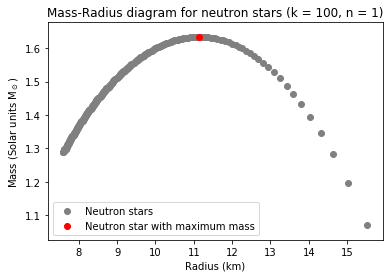

Figure 1


In [294]:
plt.figure()
plt.title("Mass-Radius diagram for neutron stars (k = 100, n = 1)")
plt.scatter(radius_array * conversionfactor * 1e-5, mass_array, label = "Neutron stars" , color = 'gray')
plt.scatter(maximumRadius * conversionfactor * 1e-5, maximumMass, label = "Neutron star with maximum mass", color = 'red')
plt.legend()
plt.xlabel("Radius (km)")
plt.ylabel("Mass (Solar units M$_\odot$)")
plt.show()
print("Figure 1")

The polytropic model used for the equations of state had two constants - the constant of proportionality K and the polytropic index n. The following is the code used to loop through a few indices close to what was chosen (n = 1) to see how it changes the mass-radius curve. Instead of a list, a dictionary was used to store both mass and radii data for different polytropic indices ( n = 0.5, 0.75, 1).

In [295]:
dctRadius = {k:[] for k in range(3)}
dctMass = {h:[] for h in range(3)}

for n in range(2, 5, 1):
    for rhog0 in rhogspan:
        initialmp = initialConditions(rhog0, r0, 100, n/4)
        radiusSolved, massPressureSolved = eulersmethodforTOV(radiusspan, initialmp, TOV)
        
        dctRadius[n-2].append(radiusSolved * conversionfactor * 1e-5)
        dctMass[n-2].append(massPressureSolved[0])

#looping through a few polytropic indeces to see how they affect the Mass-Radius curve

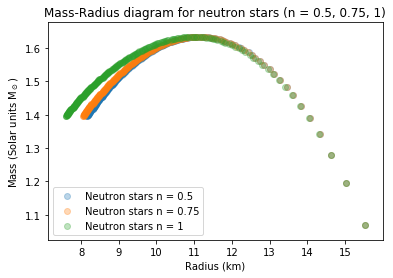

Figure 2


In [296]:
plt.figure()
plt.title("Mass-Radius diagram for neutron stars (n = 0.5, 0.75, 1)")
plt.scatter(dctRadius[0], dctMass[0], label = "Neutron stars n = 0.5", alpha = 0.3)
plt.scatter(dctRadius[1], dctMass[0], label = "Neutron stars n = 0.75", alpha = 0.3)
plt.scatter(dctRadius[2], dctMass[0], label = "Neutron stars n = 1", alpha = 0.3)
plt.legend()
plt.xlabel("Radius (km)")
plt.ylabel("Mass (Solar units M$_\odot$)")
plt.show()
print("Figure 2")

The same principle was used to loop through a few proportionality constants ( k = 500, 750, 1000, 150, 1500).

In [297]:
dctRadius2 = {k2:[] for k2 in range(50, 175, 25)}
dctMass2 = {h2:[] for h2 in range(50, 175, 25)}

for n2 in range(50, 175, 25):
    for rhog0 in rhogspan:
        initialmp = initialConditions(rhog0, r0, n2*10, 1)
        radiusSolved, massPressureSolved = eulersmethodforTOV(radiusspan, initialmp, TOV)
        
        dctRadius2[n2].append(radiusSolved * conversionfactor * 1e-5)
        dctMass2[n2].append(massPressureSolved[0])

#looping through a few constant of proportionalities to see how they affect the Mass-Radius curve

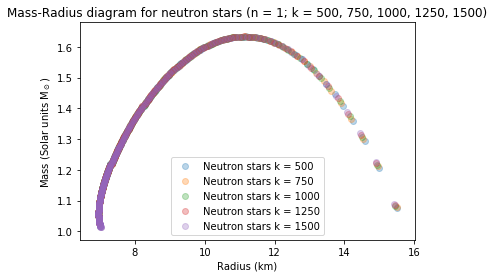

Figure 3


In [298]:
plt.figure()
plt.title("Mass-Radius diagram for neutron stars (n = 1; k = 500, 750, 1000, 1250, 1500)")
plt.scatter(dctRadius2[50], dctMass2[50], label = "Neutron stars k = 500", alpha = 0.3)
plt.scatter(dctRadius2[75], dctMass2[75], label = "Neutron stars k = 750", alpha = 0.3)
plt.scatter(dctRadius2[100], dctMass2[100], label = "Neutron stars k = 1000", alpha = 0.3)
plt.scatter(dctRadius2[125], dctMass2[125], label = "Neutron stars k = 1250", alpha = 0.3)
plt.scatter(dctRadius2[150], dctMass2[150], label = "Neutron stars k = 1500", alpha = 0.3)
plt.legend()
plt.xlabel("Radius (km)")
plt.ylabel("Mass (Solar units M$_\odot$)")
plt.show()
print("Figure 3")

## Results

With the use of the Tolenkov-Oppenheimer-Volkoff equation and the polytropic equation of state, it was found that the maximum mass of the neutron star is 1.63 $M_\odot$ and the radius of this star - 11.09 km. To compare, the highest neutron star recorded so far is the J0740+6620 pulsar with the mass of 2.17 $M_\odot$ and with a radius of 30 km. LIGOs work with gravitational waves suggest that 2.17 $M_\odot$ is the possible highest mass for a neutron star[14]. This data shows that there are some limitations to the model that was used for these calculations. Figure 1 shows the Mass-Radius relation curve of neutron stars of radii starting from 7 km to 16 km. The plot tells us that at lower radii, the mass is small which is to be expected. The mass increases with radius up until it reaches the highest point of mass (1.63 $M_\odot$). The mass decreases as the radius is further increased. There are more possible stars on the side where the curve is positive meaning stars are more stable with smaller radii up to about 12 km and there is a rapid fall of with the number of stars with higher radii[15].

Since all of the calculations were based on the polytropic model, the constants that determine the relationship between density and pressure were investigated as well. Figure 2 shows the relationship between the shape of the Mass-Radius curve and the polytropic index. The polytropic model can be used to model most of the stars and the agreed value for neutron stars is between n = 0.5 and n = 1[10]. The graph shows that the change between the negative side of the curve does not really change with the polytropic index, as well as the maximum point for star mass. The stars with smaller radii between 7km to 11km are clearly shifted to the left side. Higher polytropic indices are used to model stars like white dwarfs and main-sequence stars and the graph confirms that. Figure 3 shows how the constant of proportionality influences the Mass-Radius curve. The curve itself does not look any different, although the points themselves seem to be shifted along the curve with not much influence overall.



## Conclusion


In conclusion, the highest mass a neutron star can have is 1.63 $M_\odot$ and with a radius of 11.09 km. It is clear that there is a clear relation between the radius of the neutron star and its mass (Figure 1). Increasing the radii results in an increase of mass and when the highest point is reached, further increasing the radius produces a decrease in mass. The polytropic model used for the equation of state has a lot of limitations as it is a very simple estimation of the interior of a neutron star. The polytropic index and the constant of proportionality do not have a very huge influence over the results (Figure 2, Figure 3).

### References

1 - M. Seeds, D. Backman. (2009). "Astronomy: The Solar System and Beyond (6th edition)". Cengage Learning. p.339.

2 - J. Chadwick. (1932). "Possible Existence of a Neutron". Nature, Volume 129.

3 - A. S. Burrows. (2015). "Baade and Zwicky: "Super-novae," neutron stars, and cosmic rays". PNAS, Volume 112.

4 - A. Hewish, S. E. Okoye. (1965). "Evidence for an Unusual Source of High Radio Brightness Temperature in the Crab Nebula". Nature, Volume 207. p.59-60.

5 - A. Y. Potekhin. (2010). "The physics of neutron stars". Usp. Fiz. Nauk, Volume 180. p.1279–1304.

6 -  W. Pauli. (1928). "Uber das H-Theorem vom Anwachsen der Entropie vom Stand-punkt der neuen Quantenmechanik". Probleme der modernen Physik. p.30-45.

7 - S. Chandrasekhar. (1939). "An introduction to the Study of Stellar Structure". Dover Publications.

8 - G. Venkataraman. (1992). "Chandrasekhar and His Limit". Universities Press.

9 - J.R. Oppenheimer, G.M. Volkoff. (1939). "On massive neutron cores". Physical Review, Volume 55.

10 - G.P. Horedt. (2004). "Polytropes. Applications in Astrophysics and Related fields". Dordrecht.

11 - C.A. Raithel, F. Ozel, D. Psaltis. (2017). "From Neutron Star Observables to the Equation of State. II.

Bayesian Inference of Equation of State Pressures". The Astrophysical Journal, 844:156.

12 - J.M. Lattimer. (2019). "Neutron star mass and radius measurements". MDPI.

13 - G. Srinivasan. (2002). "The maximum mass of neutron stars". Bulletin of the Astronomical Society of India, Volume 30. p.523-547.

14 - H.T. Cromartie, E. Fonesca. (2020). "Relativistic Shapiro delay measurements of an extremely massive millisecond pulsar". Nature Astronomy, Volume 4. p.72-76.

15 - A.W. Steiner, J.M. Lattimer, E.F. Brown. (2013). "The neutron star mass-radius relation and the equation of state of dense mater". The Astrophysical Journal Letters, Volume 765, Number 1.